In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
from IPython.display import clear_output

# CHANGE THIS
FOLDERNAME = "programming/nlp/"
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd drive/My\ Drive/$FOLDERNAME


Mounted at /content/drive
/content/drive/My Drive/programming/nlp


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import string
import nltk
import re

# Preprocess

In [ ]:
file_path = 'dataset/shopee_sentiment/train_preprocess_unsegment.csv'
df = pd.read_csv(file_path)
df.drop(['Unnamed: 0', 'text'], axis=1, inplace=True)
df.head(3)

,id,class,preprocess_text
0,dee6dfc5,1,đến quán 2 lần thôi rất là thích quán tuy nằm ...
1,800813f5,0,đến quán vào tối chủ nhật có band hát khá ổn t...
2,6553e47f,0,phục vụ lâu quá mặc dù khách rất vắng đợi gần ...


In [ ]:
from collections import Counter
cnt = Counter()
for text in df["preprocess_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common()[:-1001:-1]

In [ ]:
STOP_WORDS = []
with open('dataset/shopee_sentiment/vietnamese_stopwords.txt', 'r', encoding='UTF-8') as f:
    lines = f.read().splitlines()
    STOP_WORDS.append(lines)

ACRONYMS = {}
with open('dataset/shopee_sentiment/acronym.txt', 'r', encoding='UTF-8') as f:
    lines = f.read().splitlines()
    for line in lines:
        text = line.split(',')[0]
        text_acronym = line.split(',')[1]
        ACRONYMS[text] = text_acronym

# replace words with acronyms
def replace_with_acronym(text):
    if (text in ACRONYMS):
        return ACRONYMS[text]
    return text
df['preprocess_text'] = df['preprocess_text'].apply(lambda comment: replace_with_acronym(comment))

df['preprocess_text'] = df['preprocess_text'].apply(lambda word: remove_rarewords(word))

In [ ]:
# remove uncommon words
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-1001:-1]])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

In [ ]:
df.to_csv('shopee_sentiment/preprocessed_data.csv')

In [ ]:
df['class'].value_counts(sort=False)/len(df['class']) * 100

1    50.066667
0    49.933333
Name: class, dtype: float64

Text(0, 0.5, 'Label')

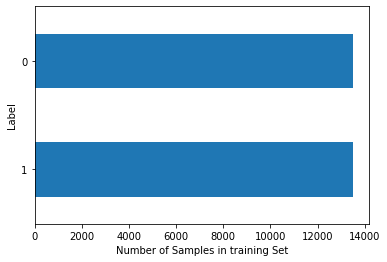

In [ ]:
ax = df['class'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Samples in training Set')
ax.set_ylabel('Label')

# Visualization

## Wordcloud

In [ ]:
negative_review = df[df['class'] == 0]
positive_review = df[df['class'] == 1]

In [ ]:
review_string = []
for t in df.preprocess_text:
    review_string.append(t)
review_string = pd.Series(review_string).str.cat(sep=' ')

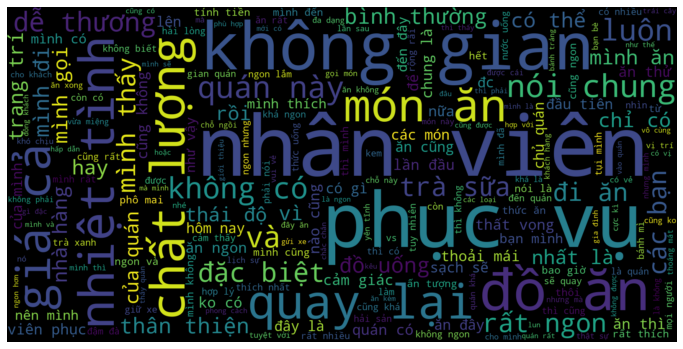

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(review_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvec = CountVectorizer()
cvec.fit(df.preprocess_text)

neg_doc_matrix = cvec.transform(df[df['class'] == 0].preprocess_text)
pos_doc_matrix = cvec.transform(df[df['class'] == 1].preprocess_text)

neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

term_freq_df = pd.DataFrame([neg, pos], columns=cvec.get_feature_names()).transpose()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cvec.get_feature_names()

['01',
 '012',
 '0120',
 '0128912424',
 '0165621682',
 '01687579',
 '02',
 '0209',
 '021',
 '024',
 '025',
 '028',
 '03',
 '03646584',
 '04',
 '0405',
 '04072013',
 '05',
 '0509',
 '050pm',
 '0510',
 '06',
 '0617309',
 '064',
 '0678',
 '07',
 '073',
 '08',
 '0803',
 '09',
 '090',
 '0901872105',
 '0902739131',
 '090290340',
 '0903',
 '0903043468',
 '0903919218',
 '090685238',
 '0908',
 '0908584581',
 '0909',
 '0909567526',
 '090963690',
 '090981593',
 '090982486',
 '0914',
 '091560373',
 '0926196',
 '0932825482',
 '0934919181',
 '093525295',
 '09367146',
 '0937476163',
 '0937570490',
 '094',
 '0962',
 '0967',
 '0968',
 '096824139',
 '097',
 '0973',
 '098',
 '09849090',
 '0am',
 '0d',
 '0h',
 '0k',
 '0ng',
 '0pm',
 '0rder',
 '0vn',
 '0vnd',
 '0vnđ',
 '0đ',
 '0đồng',
 '10',
 '101',
 '1010',
 '101027363060',
 '1015',
 '101k',
 '102',
 '1020',
 '103',
 '1030',
 '103k',
 '104',
 '104k',
 '1050k',
 '1054k',
 '105k',
 '106',
 '106a',
 '106k',
 '107',
 '1074',
 '107k',
 '108',
 '1080',
 '10814'

In [ ]:
term_freq_df.columns = ['negative','positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

Text(0.5, 1.0, 'Top 100 tokens in negative tweets')

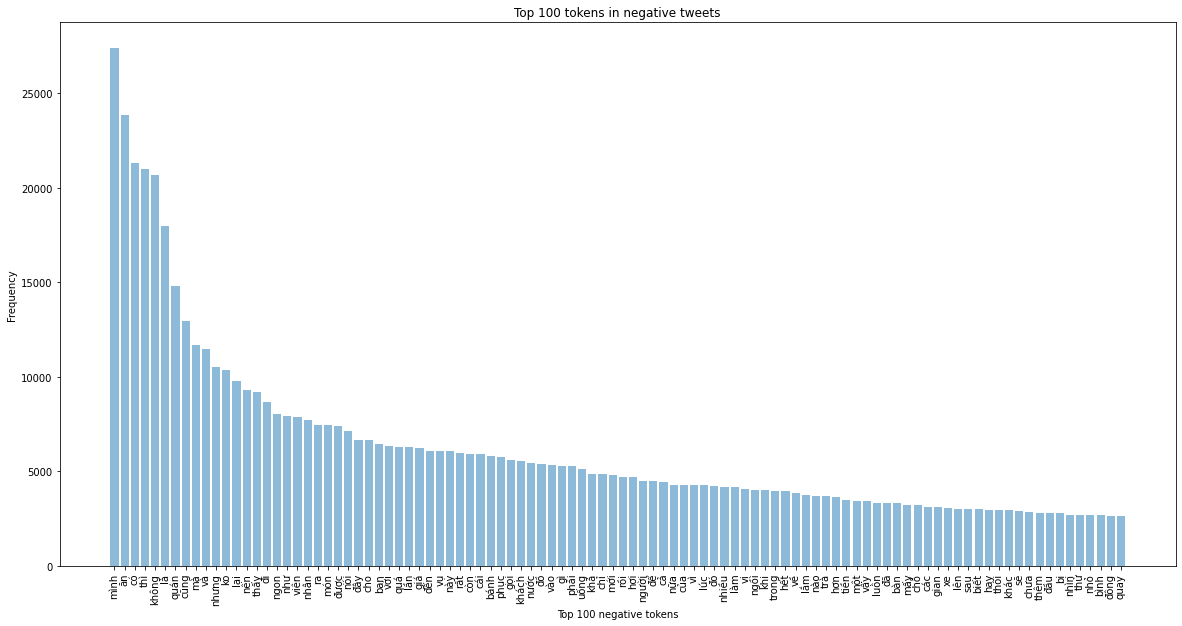

In [ ]:
y_pos = np.arange(100)
plt.figure(figsize=(20,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:100], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:100].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 100 negative tokens')
plt.title('Top 100 tokens in negative tweets')

Text(0.5, 1.0, 'Top 100 tokens in positive tweets')

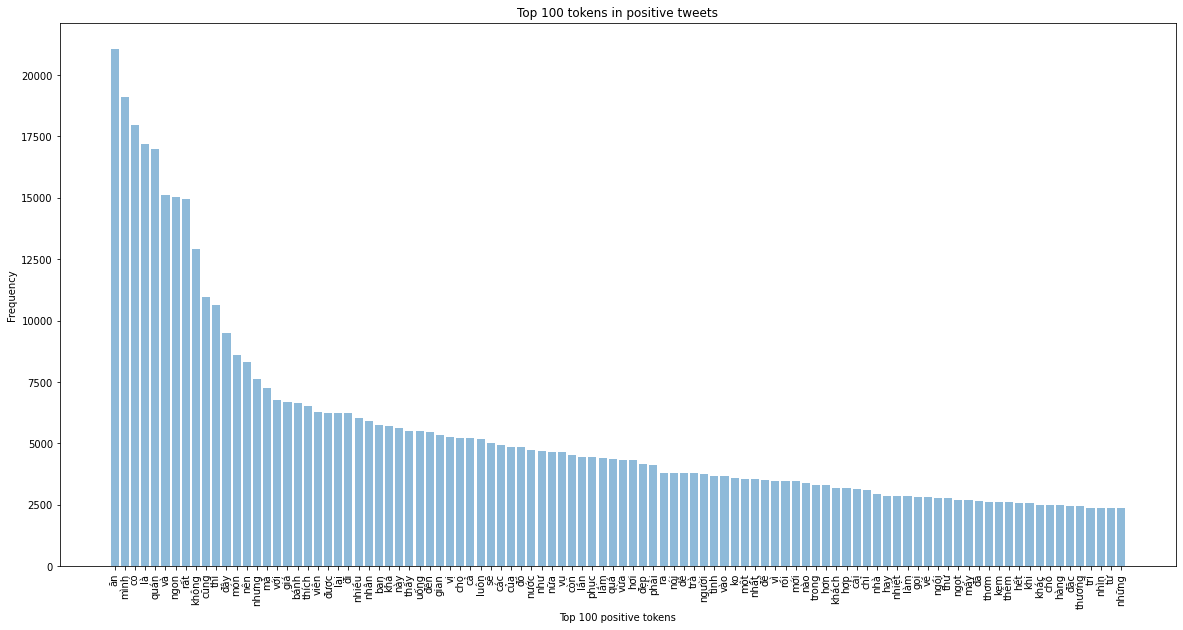

In [ ]:
y_pos = np.arange(100)
plt.figure(figsize=(20,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:100], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:100].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 100 positive tokens')
plt.title('Top 100 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

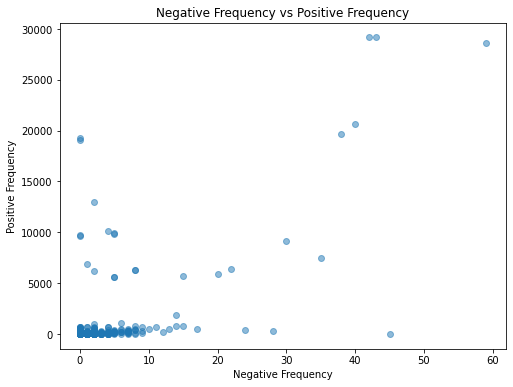

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

# Model

In [ ]:
df = pd.read_csv('shopee/preprocessed_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.head(3)

,ttn_gia,ttn_bl_diem,ttn_bl_noi_dung,ttn_thuong_hieu
0,45.000,5,chất lượng sản phẩm tuyệt vời,No Brand
1,255.000,4,"chất lượng sản phẩm tuyệt vời, chất lượng sản ...",No Brand
2,105.000,5,chất lượng sản phẩm tuyệt vời đóng gói sản phẩ...,No Brand


## Baseline

In [ ]:
x = df.preprocess_text
y = df['class']
from sklearn.model_selection import train_test_split
SEED = 2000
X_train, X_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)
print("Train set has total {0} entries with \n {1:.2f}% negative, {2:.2f}% positive".format(
    len(X_train), 
    (len(X_train[y_train == 0]) / (len(X_train)*1.))*100, 
    (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))
print("Validation set has total {0} entries with \n {1:.2f}% negative, {2:.2f}% positive".format(
    len(X_val), 
    (len(X_val[y_val == 0]) / (len(X_val)*1.))*100, 
    (len(X_val[y_val == 1]) / (len(X_val)*1.))*100))
print("Test set has total {0} entries with \n {1:.2f}% negative, {2:.2f}% positive".format(
    len(X_test),
    (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
    (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Train set has total 26460 entries with 
 50.00% negative, 50.00% positive
Validation set has total 270 entries with 
 45.93% negative, 54.07% positive
Test set has total 270 entries with 
 47.78% negative, 52.22% positive


If the model predict all are positive, it will get 54.07% accuracy on validation set 

## Count Vectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from time import time

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

cvec = CountVectorizer()
tvec = TfidfVectorizer(stop_words=None, max_features=100000, ngram_range=(1, 3))
lr = LogisticRegression()

In [ ]:
def lr_cv(splits, X, Y, pipeline, average_method):
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        lr_fit = pipeline.fit(X[train], Y[train])
        prediction = lr_fit.predict(X[test])
        scores = lr_fit.score(X[test],Y[test])
            
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('            1            2')
        print('precision:',precision_score(Y[test], prediction, average=None))
        recall.append(recall_score(Y[test], prediction, average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))
    return np.mean(accuracy)

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

pipeline = Pipeline([
    ('vectorizer', cvec),
    ('classifier', lr)
])

lr_cv(5, df.preprocess_text, df['class'], pipeline, 'macro')


Baseline result (trying to reduce the corpus to 6557(len counter) words by removing words which appear 1, 2 and 3 times

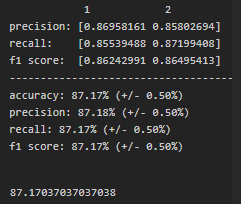

the result is slightly worse than not doing anything. So we're gonna leave the prepocessed data as it is

Baseline result: (without removing rare words)

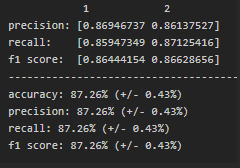

Baseline result accuracy  is 87.26%

## Count Vectorizer + N-gams

In [ ]:
cvec.set_params(ngram_range=(1, 2))
lr_cv(5, df.preprocess_text, df['class'], pipeline, 'macro')


In [ ]:
cvec.set_params(ngram_range=(1, 3))
lr_cv(5, df.preprocess_text, df['class'], pipeline, 'macro')

Result:
2-grams:

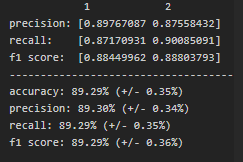

3-grams:

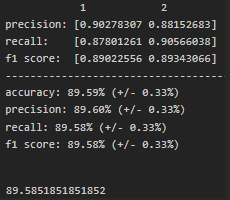

3-grams works best

##  TF-idf

In [ ]:
n_features = np.arange(10000,100001,10000)
result = []
for n in n_features: 
    tvec.set_params(max_features=n, ngram_range=(1, 3))
    accuracy = lr_cv(5, df.preprocess_text, df['class'], pipeline, 'macro')
    result.append(accuracy)

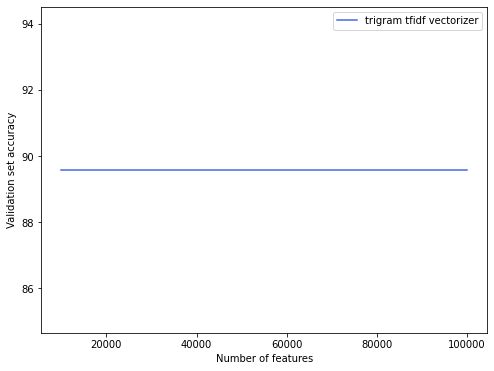

In [ ]:
n_features = np.arange(10000,100001,10000)
nfeatures_plot = pd.DataFrame(n_features,columns=['nfeatures'])
nfeatures_plot['validation_accuracy'] = result
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot.nfeatures, nfeatures_plot.validation_accuracy, label='trigram tfidf vectorizer',color='royalblue')
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

So we are going to pick the number of features as: 100.000

Best model currently

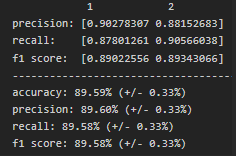

##  TF-idf + Chi2

Let's try to use Chi2 to reduce the number of features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

D:\Library\sdk\Anaconda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


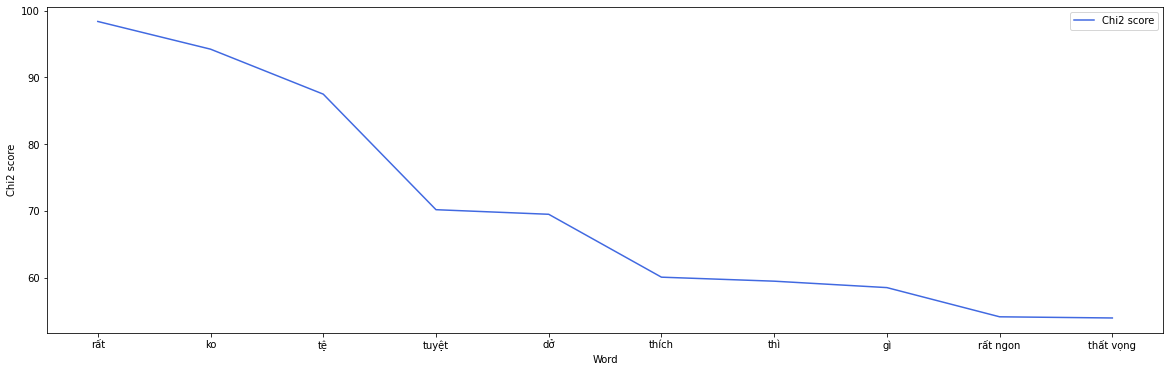

In [ ]:
x = df.preprocess_text
y = df['class']
tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_tfidf = tvec.fit_transform(x)
chi2score = chi2(x_tfidf, y)[0]

chi2_df = pd.DataFrame({
    'word': tvec.get_feature_names(),
    'score': chi2score
})
chi2_df = chi2_df.sort_values(by='score', ascending=False)
plt.figure(figsize=(20,6))
plt.plot(chi2_df.word[:10], chi2_df.score[:10], label='Chi2 score',color='royalblue')
plt.xlabel("Word")
plt.ylabel("Chi2 score")
plt.legend()


In [ ]:
tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
chi2_result = []
n_features = np.arange(10000,100000,10000)
lr = LogisticRegression(max_iter=100)

for n in n_features:
    chi2_tranformer = SelectKBest(chi2, k=n)
    pipeline = make_pipeline(tvec,chi2_tranformer, lr)
    score = lr_cv(5, df.preprocess_text, df['class'], pipeline, 'macro')
    chi2_result.append(score)
    print("chi2 feature selection evaluation calculated for {} features".format(n))
    print(score)


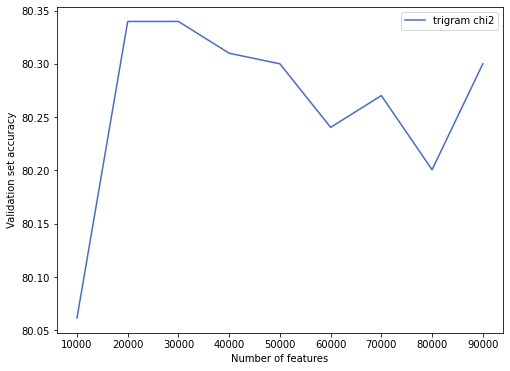

In [ ]:
chi2_plot = pd.DataFrame(n_features,columns=['nfeatures'])
chi2_plot['validation_accuracy'] = chi2_result
plt.figure(figsize=(8,6))
plt.plot(chi2_plot.nfeatures, chi2_plot.validation_accuracy, label='trigram chi2',color='royalblue')
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

So we'll pick k=20000 for chi square

In [ ]:
tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
chi2_tranformer = SelectKBest(chi2, k=10000)
lr = LogisticRegression(max_iter=1000)
pipeline = make_pipeline(tvec,chi2_tranformer, lr)
lr_cv(5, df.preprocess_text, df['class'], pipeline, 'macro')

Tfidf + Chi2 result:

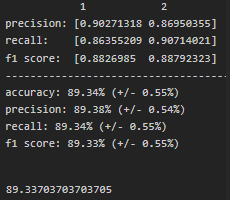